In [43]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import astropy.units as u
from astropy.time import Time
from astroplan import Observer
pd.options.display.max_rows = 999

In [5]:
lat, lon = 23, 72
tz = 'Asia/Kolkata'
ahmedabad = Observer(latitude=lat*u.deg, longitude=lon*u.deg, elevation=0*u.m, timezone=tz)

In [25]:
def sunrise(observer, t):
    t_iso = Time(t.isoformat())
    rise = observer.sun_rise_time(t_iso)
    
    rise_time = datetime.datetime.strptime(rise.iso, '%Y-%m-%d %H:%M:%S.%f')
    rise_time += datetime.timedelta(hours=5, minutes=30)
    rise_time = rise_time.time()
    
    t_ = rise_time.hour + (rise_time.minute / 60.0) + (rise_time.second / 3600.0)
    return rise_time, t_

In [26]:
start_date = datetime.date(2018,1,1)
x = [start_date + datetime.timedelta(days=i) for i in range(365*2)]
y = [sunrise(ahmedabad, t) for t in x]
dt_y = [y_[0] for y_ in y]
dec_y = [y_[1] for y_ in y]

(array([736664., 736695., 736726., 736754., 736785., 736815., 736846.,
        736876., 736907., 736938., 736968., 736999., 737029., 737060.,
        737091., 737119., 737150., 737180., 737211., 737241., 737272.,
        737303., 737333., 737364., 737394., 737425., 737456.]),
 <a list of 27 Text xticklabel objects>)

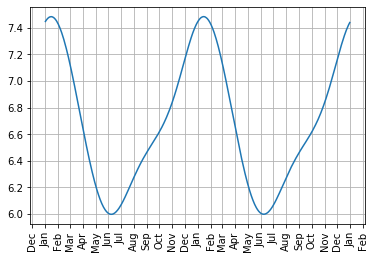

In [27]:
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%b')

plt.plot(x,dec_y)
plt.grid()
x_ = plt.gca().xaxis
x_.set_major_locator(locator)
x_.set_major_formatter(fmt)
plt.xticks(rotation=90)

In [44]:
sunrise_pandas = [pd.Timestamp(str(t_)) for t_ in dt_y]
df = pd.DataFrame({'day': x, 'sunrise': sunrise_pandas})
df['diff'] = df.sunrise.diff()

In [45]:
df

,day,sunrise,diff
0,2018-01-01,2019-12-13 07:26:55.571,NaT
1,2018-01-02,2019-12-13 07:27:13.369,00:00:17.798000
2,2018-01-03,2019-12-13 07:27:29.902,00:00:16.533000
3,2018-01-04,2019-12-13 07:27:45.158,00:00:15.256000
4,2018-01-05,2019-12-13 07:27:59.123,00:00:13.965000
5,2018-01-06,2019-12-13 07:28:11.784,00:00:12.661000
6,2018-01-07,2019-12-13 07:28:23.128,00:00:11.344000
7,2018-01-08,2019-12-13 07:28:33.143,00:00:10.015000
8,2018-01-09,2019-12-13 07:28:41.815,00:00:08.672000
9,2018-01-10,2019-12-13 07:28:49.135,00:00:07.320000
